Установка и загрузка библиотек и зависимостей:

In [1]:
!pip install easyocr # установка easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 33.7 MB/s 
     |████████████████████████████████| 47.6 MB 63.3 MB/s 
     |████████████████████████████████| 604 kB 12.4 MB/s 
     |████████████████████████████████| 120 kB 14.1 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [2]:
!git clone https://github.com/ultralytics/yolov5 # загружаем репозиторий
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13322, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 13322 (delta 89), reused 115 (delta 82), pack-reused 13198
Receiving objects: 100% (13322/13322), 13.22 MiB | 31.94 MiB/s, done.
Resolving deltas: 100% (9148/9148), done.
/content/yolov5


In [3]:
!git reset --hard 82bec4c8785e123bbea01f6f2d4215c2077ac81f # фиксируем коммит

HEAD is now at 82bec4c Add NVIDIA Jetson Nano Deployment tutorial (#9656)


In [4]:
!pip install -r /content/yolov5/requirements.txt # устанавливаем зависимости

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 32.6 MB/s 


In [6]:
import cv2
import torch
import easyocr
import numpy as np
import matplotlib.pyplot as plt

Загружаем предтренированную модель:

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5m', pretrained=True)

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-10-4 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)



  0%|          | 0.00/40.8M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients
Adding AutoShape... 


Посмотрим на её работу:

In [ ]:
img = 'https://images.squarespace-cdn.com/content/v1/53dd6676e4b0fedfbc26ea91/1489672233914-JE3SIYUL89DRA74JPXTI/image-asset.jpeg'

result = model(img)
result.print()

image 1/1: 1406x2500 2 persons, 5 cars, 6 traffic lights
Speed: 130.4ms pre-process, 45.8ms inference, 38.5ms NMS per image at shape (1, 3, 384, 640)


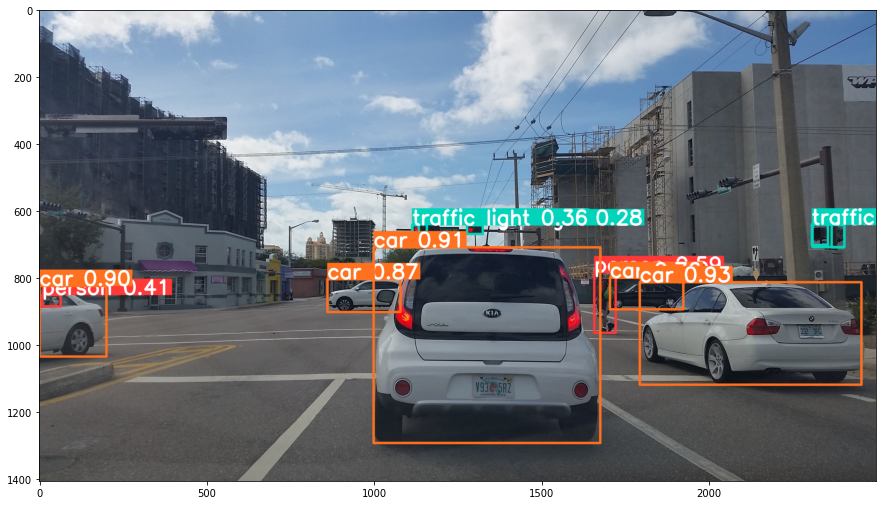

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(15, 10))
plt.imshow(np.squeeze(result.render()))
plt.show()

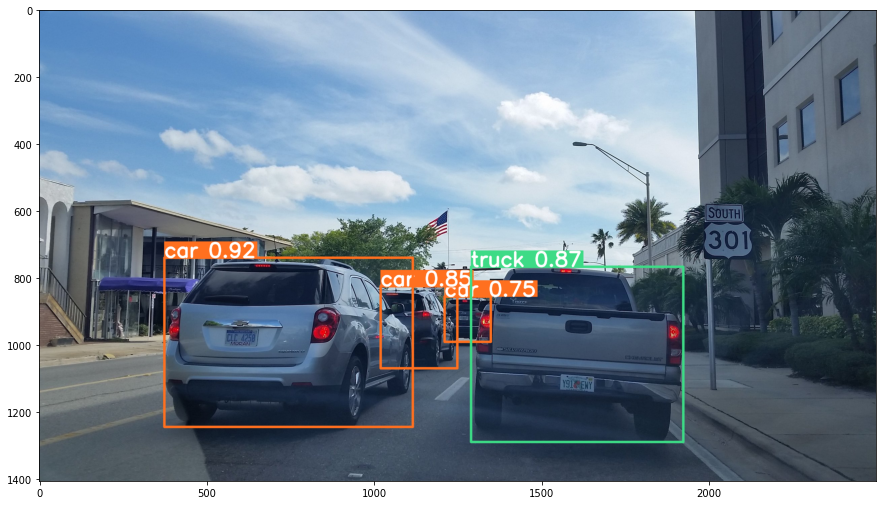

In [ ]:
%matplotlib inline

img = 'https://images.squarespace-cdn.com/content/v1/53dd6676e4b0fedfbc26ea91/1489674142018-GRIQ0EAU5C6CZA33CSU1/Queued301.jpg'

fig = plt.figure(figsize=(15, 10))
result = model(img)
plt.imshow(np.squeeze(result.render()))
plt.show()

Загружаем датасет:

In [7]:
!mkdir /content/yolov5/license_plate_data

In [8]:
%cd /content/yolov5/license_plate_data

/content/yolov5/license_plate_data


In [9]:
!gdown 1Msx3MV6kVzdC46_YSVveGMQugxBVshfo # загружаем датасет

Downloading...
From: https://drive.google.com/uc?id=1Msx3MV6kVzdC46_YSVveGMQugxBVshfo
To: /content/yolov5/license_plate_data/final_data_v2.1.zip
100% 897M/897M [00:12<00:00, 73.7MB/s]


In [10]:
!unzip /content/yolov5/license_plate_data/final_data_v2.1.zip # распаковываем zip-файл

Archive:  /content/yolov5/license_plate_data/final_data_v2.1.zip
 extracting: classes.txt             
  inflating: test/images/screenshot_1664704636694.png  
  inflating: test/images/screenshot_1664704639331.png  
  inflating: test/images/screenshot_1664704642016.png  
  inflating: test/images/screenshot_1664704644928.png  
  inflating: test/images/screenshot_1664704646787.png  
  inflating: test/images/screenshot_1664704648798.png  
  inflating: test/images/screenshot_1664704650328.png  
  inflating: test/images/screenshot_1664704651629.png  
  inflating: test/images/screenshot_1664704654305.png  
  inflating: test/images/screenshot_1664704657039.png  
  inflating: test/labels/screenshot_1664704636694.txt  
  inflating: test/labels/screenshot_1664704639331.txt  
  inflating: test/labels/screenshot_1664704642016.txt  
  inflating: test/labels/screenshot_1664704644928.txt  
  inflating: test/labels/screenshot_1664704646787.txt  
  inflating: test/labels/screenshot_1664704648798.txt  
 

Обучение модели:

In [ ]:
!gdown 1avNLqauVieuopfMwkEuz1DfvLvDcglLm # загружаем конфигурационный файл датасета

Downloading...
From: https://drive.google.com/uc?id=1avNLqauVieuopfMwkEuz1DfvLvDcglLm
To: /content/yolov5/license_plate_data/dataset.yaml
100% 412/412 [00:00<00:00, 813kB/s]


In [ ]:
!gdown 1aEAgsztSXuk0sZbjgpWTIGP9SnJPHdxd # загружаем подправленный конфигурационный файл модели

Downloading...
From: https://drive.google.com/uc?id=1aEAgsztSXuk0sZbjgpWTIGP9SnJPHdxd
To: /content/yolov5/license_plate_data/yolov5m_edited.yaml
100% 1.40k/1.40k [00:00<00:00, 2.89MB/s]


In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!python train.py --img 640 --batch-size 8 --epochs 200 --data /content/yolov5/license_plate_data/dataset.yaml --weights /content/yolov5/yolov5m.pt --cfg /content/yolov5/license_plate_data/yolov5m_edited.yaml --workers 2 --device 0

train: weights=/content/yolov5/yolov5m.pt, cfg=/content/yolov5/license_plate_data/yolov5m_edited.yaml, data=/content/yolov5/license_plate_data/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 3 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.2-180-g82bec4c Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0

Загружаем модель и устанавливаем свои веса:

In [ ]:
#!mv /content/yolov5/runs/train/exp/weights/best.pt /content/ # если тренировали модель!!!

In [11]:
%cd /content
!gdown 1htNcnFONfzpevnFL5iw3OpycEK3tG71m # если не тренировали модель!!!

/content
Downloading...
From: https://drive.google.com/uc?id=1htNcnFONfzpevnFL5iw3OpycEK3tG71m
To: /content/best.pt
100% 42.3M/42.3M [00:00<00:00, 133MB/s]


In [12]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt', force_reload=True)

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-10-5 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m_edited summary: 212 layers, 20861016 parameters, 0 gra

Посмотрим на её работу:

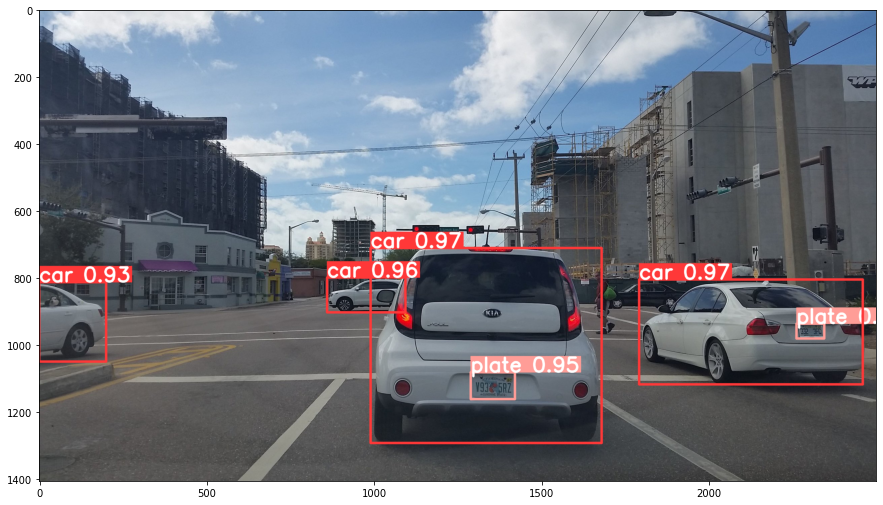

In [ ]:
%matplotlib inline

img = 'https://images.squarespace-cdn.com/content/v1/53dd6676e4b0fedfbc26ea91/1489672233914-JE3SIYUL89DRA74JPXTI/image-asset.jpeg'
result = model(img)

fig = plt.figure(figsize=(15, 10))
plt.imshow(np.squeeze(result.render()))
plt.show()

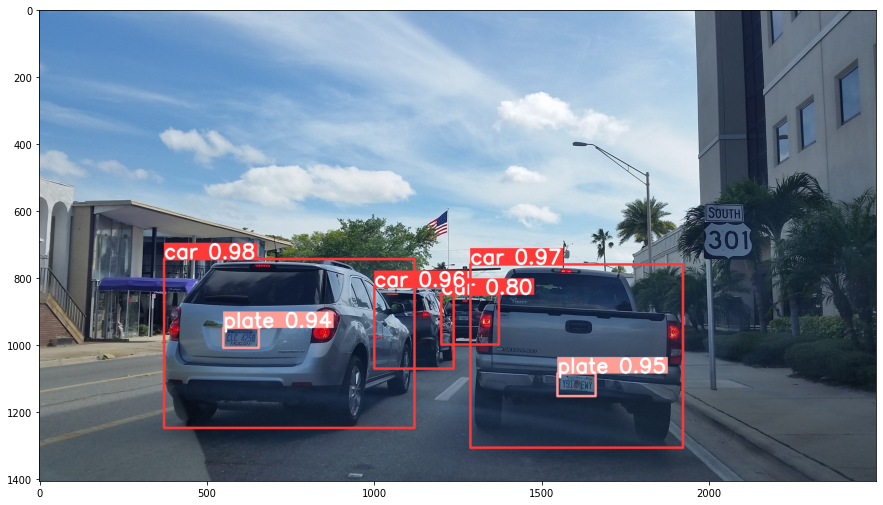

In [ ]:
%matplotlib inline

img = 'https://images.squarespace-cdn.com/content/v1/53dd6676e4b0fedfbc26ea91/1489674142018-GRIQ0EAU5C6CZA33CSU1/Queued301.jpg'
result = model(img)

fig = plt.figure(figsize=(15, 10))
plt.imshow(np.squeeze(result.render()))
plt.show()

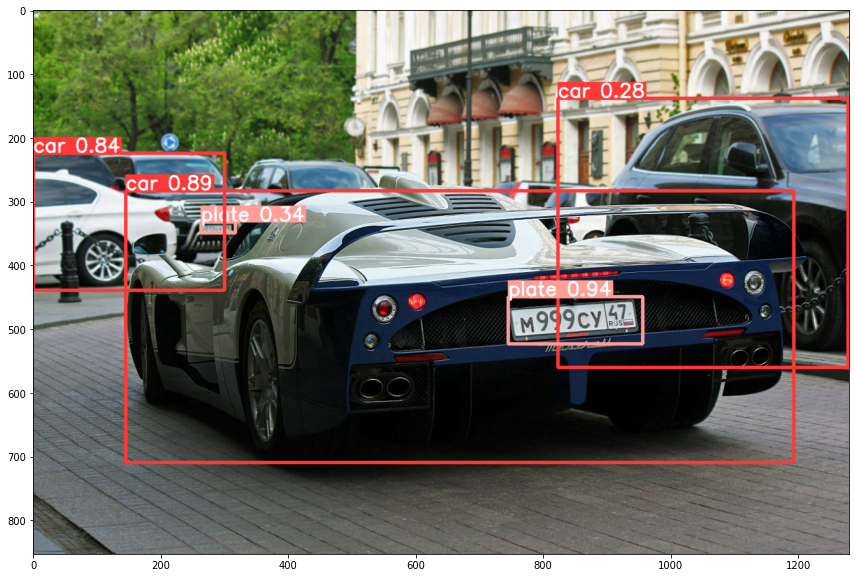

In [ ]:
%matplotlib inline

img = 'https://img01.avto-nomer.ru/141229/o/ru5076492.jpg'
result = model(img)

fig = plt.figure(figsize=(15, 10))
plt.imshow(np.squeeze(result.render()))
plt.show()

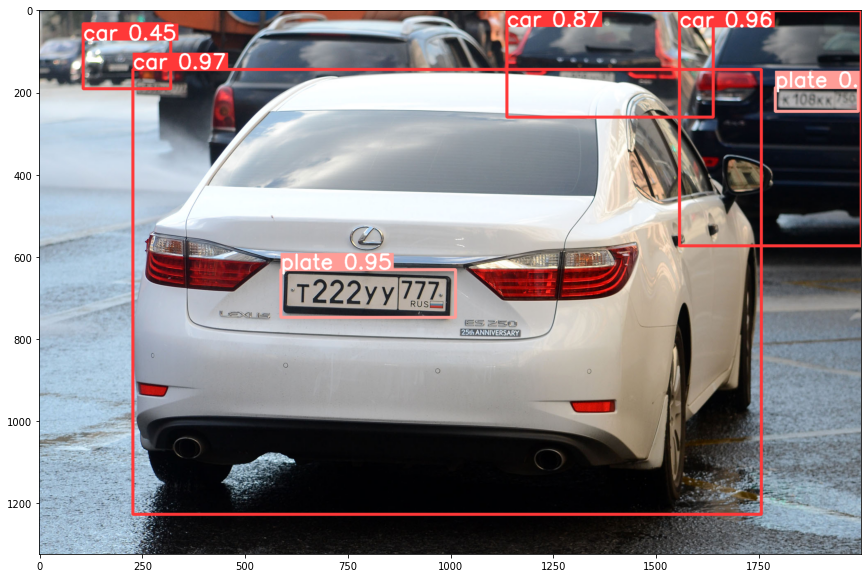

In [32]:
%matplotlib inline

img = 'https://pp.userapi.com/jRKa2x2c5RILhZ3nVvBS2k_PSh9hwn5aFno9yw/raZl86Iulzg.jpg'
result = model(img)

fig = plt.figure(figsize=(15, 10))
plt.imshow(np.squeeze(result.render()))
plt.show()

Детектирование на изображениях и видео с easyocr:

In [14]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
%cd yolov5

/content/yolov5


In [15]:
!gdown 1Hu1sjuV3swCY9XafIxuyHWrgxSDucPPq # загружаем файл для детектирования с поммощью easyocr

Downloading...
From: https://drive.google.com/uc?id=1ueH0rBt_IKaOvFKjwDLMdqZIsq1BQwIn
To: /content/yolov5/detect_easyocr.py
100% 15.2k/15.2k [00:00<00:00, 25.8MB/s]


In [26]:
!python detect_easyocr.py --weights /content/best.pt --source https://pp.userapi.com/jRKa2x2c5RILhZ3nVvBS2k_PSh9hwn5aFno9yw/raZl86Iulzg.jpg --device 0

detect_easyocr: weights=['/content/best.pt'], source=https://pp.userapi.com/jRKa2x2c5RILhZ3nVvBS2k_PSh9hwn5aFno9yw/raZl86Iulzg.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
Found https://pp.userapi.com/jRKa2x2c5RILhZ3nVvBS2k_PSh9hwn5aFno9yw/raZl86Iulzg.jpg locally at raZl86Iulzg.jpg
YOLOv5 🚀 v6.2-180-g82bec4c Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m_edited summary: 212 layers, 20861016 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/yolov5/raZl86Iulzg.jpg: 448x640 4 cars, 2 plates, 22.8ms
Speed: 0.5ms pre-process, 22.8ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Result

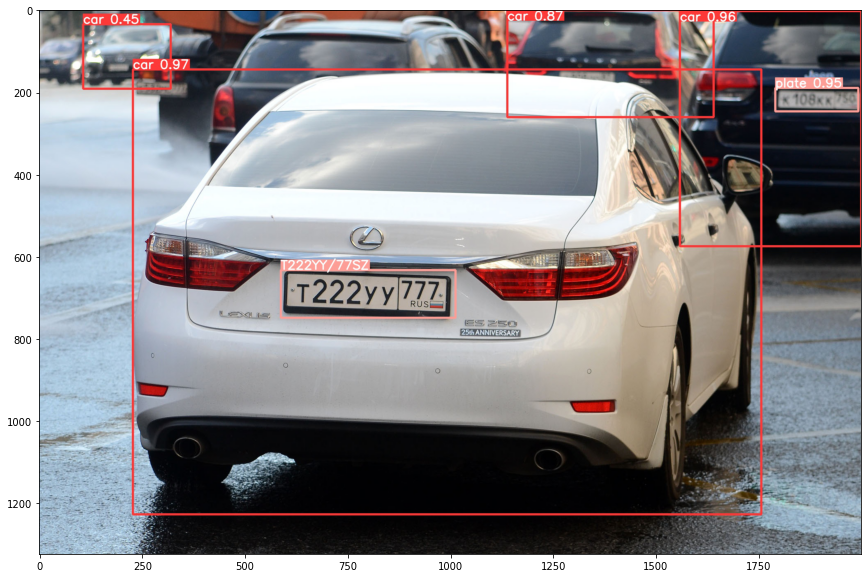

In [27]:
%matplotlib inline

fig = plt.figure(figsize=(15, 10))
img = plt.imread('/content/yolov5/runs/detect/exp/raZl86Iulzg.jpg')

plt.imshow(img)
plt.show()

In [ ]:
!mv /content/yolov5/runs/detect/exp/raZl86Iulzg.jpg /content/drive/MyDrive/ #переместить к себе на гугл-диск

In [ ]:
%cd yolov5

/content/yolov5


In [28]:
!gdown 1hEf8aH8TnWlQ4cdX9sOxukpmTtj7lwrk # пример видео

Downloading...
From: https://drive.google.com/uc?id=1hEf8aH8TnWlQ4cdX9sOxukpmTtj7lwrk
To: /content/yolov5/cars-1.mp4
100% 8.76M/8.76M [00:00<00:00, 16.0MB/s]


In [ ]:
!python detect_easyocr.py --weights /content/best.pt --source /content/yolov5/cars-1.mp4 --device 0

In [ ]:
!mv /content/yolov5/runs/detect/exp2/cars-1.mp4 /content/drive/MyDrive/ #переместить к себе на гугл-диск

Метрики:

In [17]:
%cd /content/yolov5/license_plate_data

/content/yolov5/license_plate_data


In [18]:
!gdown 1Hfzl5MFO5ha1LokuIqYe-FiBjXkfx0eM #скачиваем конфигурационный файл для тестового датасета

Downloading...
From: https://drive.google.com/uc?id=1Hfzl5MFO5ha1LokuIqYe-FiBjXkfx0eM
To: /content/yolov5/license_plate_data/test.yaml
100% 413/413 [00:00<00:00, 742kB/s]


In [21]:
%cd /content/yolov5/

/content/yolov5


In [23]:
!python val.py --weights /content/best.pt --data /content/yolov5/license_plate_data/test.yaml --img 640 --device 0

val: data=/content/yolov5/license_plate_data/test.yaml, weights=['/content/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-180-g82bec4c Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m_edited summary: 212 layers, 20861016 parameters, 0 gradients, 47.9 GFLOPs
100% 755k/755k [00:00<00:00, 128MB/s]
val: Scanning '/content/yolov5/license_plate_data/test/labels' images and labels...10 found, 0 missing, 0 empty, 0 corrupt: 100% 10/10 [00:00<00:00, 70.49it/s]
val: New cache created: /content/yolov5/license_plate_data/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:05<00:00,  5.00s/it]
                   all         10       